# **Segmentación de clientes en una aerolínea** - basada en el modelo LRFMC utilizando K-means

**Responsable:** Litahu

### 📃 **TABLA DE CONTENIDO**
> 1. Cargar Dataset
> 2. Análisis exploratorio de datos
> 3. Ingeniería de características
> 4. Modelando el análisis
> 5. Interpretación y recomendación
> 6. Referencia

#  **1. Cargar Dataset**

# Nueva sección

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read dataset
df = pd.read_csv('/content/drive/MyDrive/CERTIFICATIONS/Dashboards_trabajo_share/colab_AirlineSegmentation_flight.csv')
df.shape

(62988, 23)

# **2. Análisis exploratorio de datos**

In [ ]:
# Forma del Dataset
print('Total records:', df.shape[0] )
print('Total de características:', df.shape[1])

Total records: 62988
Total de características: 23


In [ ]:
# Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
# Muestreo de datos
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
53621      59360   9/26/2011         9/26/2011    Male         4   beijing   
50169      49766   6/16/2010         6/16/2010    Male         4    shamen   
53873      50044   3/20/2011         3/20/2011  Female         4  shenzhen   
31028      54809    7/2/2006          7/2/2006  Female         4   beijing   
18355       6841  12/21/2012          1/2/2013  Female         4   shantou   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
53621       beijing           CN  33.0  3/31/2014  ...    1423.0        4113   
50169        fujian           CN  41.0  3/31/2014  ...       0.0        4796   
53873     guangdong           CN  36.0  3/31/2014  ...    1838.0        4154   
31028       beijing           CN  39.0  3/31/2014  ...       0.0        8392   
18355     guangdong           CN  51.0  3/31/2014  ...   11648.0       20669   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
53621         3/12/2014           20    166.000000          426   
50169        12/20/2012          468     26.500000           34   
53873         1/13/2014           79     96.000000           96   
31028         5/27/2012          675     10.333333           27   
18355         1/26/2014           66     32.416667           91   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
53621               0      0.539273        6693               27  
50169               0      0.568859        2497                0  
53873               0      0.525000         786                0  
31028               0      0.850000        5608                0  
18355               0      0.646368        8376                0  

[5 rows x 23 columns]

In [ ]:
# Valores pérdidos
counts = df.isna().sum().sort_values(ascending=False)

# Presentar los valores null en porcentaje
percents = round(df.isna().mean()*100,2).sort_values(ascending=False)

null = pd.concat([counts, percents], axis=1, keys=["null_counts", "%"])
null

null_counts     %
WORK_PROVINCE             3248  5.16
WORK_CITY                 2269  3.60
SUM_YR_1                   551  0.87
AGE                        420  0.67
SUM_YR_2                   138  0.22
WORK_COUNTRY                26  0.04
GENDER                       3  0.00
MEMBER_NO                    0  0.00
LAST_FLIGHT_DATE             0  0.00
Points_Sum                   0  0.00
avg_discount                 0  0.00
EXCHANGE_COUNT               0  0.00
MAX_INTERVAL                 0  0.00
AVG_INTERVAL                 0  0.00
LAST_TO_END                  0  0.00
BP_SUM                       0  0.00
SEG_KM_SUM                   0  0.00
FFP_DATE                     0  0.00
FLIGHT_COUNT                 0  0.00
LOAD_TIME                    0  0.00
FFP_TIER                     0  0.00
FIRST_FLIGHT_DATE            0  0.00
Point_NotFlight              0  0.00

In [ ]:
# Porcentaje de registros y filas que contiene valores faltantes
df_nan = df[df.isna().any(axis=1)]
print(f'Porcentaje de valores faltantes en el conjunto de datos : {round(len(df_nan)/len(df)*100, 2)}%')

Porcentaje de valores faltantes en el conjunto de datos : 7.51%


> Hay 6 funciones a las que le faltan valores:

*   WORK_PROVINCE
*   WORK_CITY
*   SUM_YR_1
*   AGE
*   SUM_YR_2
*   WORK_COUNTRY

> El conjunto de datos tiene un 7,51% de datos faltantes(menos del 10 %)


In [ ]:
# Comprobar si hay datos duplicados
df.duplicated().any()

False

> No hay datos duplicados

In [ ]:
# Agrupación de datos según el tipo de datos númericos
nums = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
print(nums)
print(f'Número de características numéricas: {len(nums)}')

['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Número de características numéricas: 15


In [ ]:
# Agrupación de datos según el tipo de datos categóricos
cats = df.loc[:, (df.dtypes == object)].columns.tolist()
print(cats)
print(f'Número de características categóricas: {len(cats)}')

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Número de características categóricas: 8


In [ ]:
# Dividir datos por categoría
nums = ['MEMBER_NO', 'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
# Estadística descriptiva de las variables númericas
df[nums].describe().T

count          mean           std    min           25%  \
MEMBER_NO        62988.0  31494.500000  18183.213715    1.0  15747.750000   
AGE              62568.0     42.476346      9.885915    6.0     35.000000   
FFP_TIER         62988.0      4.102162      0.373856    4.0      4.000000   
FLIGHT_COUNT     62988.0     11.839414     14.049471    2.0      3.000000   
BP_SUM           62988.0  10925.081254  16339.486151    0.0   2518.000000   
SUM_YR_1         62437.0   5355.376064   8109.450147    0.0   1003.000000   
SUM_YR_2         62850.0   5604.026014   8703.364247    0.0    780.000000   
SEG_KM_SUM       62988.0  17123.878691  20960.844623  368.0   4747.000000   
LAST_TO_END      62988.0    176.120102    183.822223    1.0     29.000000   
AVG_INTERVAL     62988.0     67.749788     77.517866    0.0     23.370370   
MAX_INTERVAL     62988.0    166.033895    123.397180    0.0     79.000000   
EXCHANGE_COUNT   62988.0      0.319775      1.136004    0.0      0.000000   
avg_discount     62988.0      0.721558      0.185427    0.0      0.611997   
Points_Sum       62988.0  12545.777100  20507.816700    0.0   2775.000000   
Point_NotFlight  62988.0      2.728155      7.364164    0.0      0.000000   

                          50%           75%       max  
MEMBER_NO        31494.500000  47241.250000   62988.0  
AGE                 41.000000     48.000000     110.0  
FFP_TIER             4.000000      4.000000       6.0  
FLIGHT_COUNT         7.000000     15.000000     213.0  
BP_SUM            5700.000000  12831.000000  505308.0  
SUM_YR_1          2800.000000   6574.000000  239560.0  
SUM_YR_2          2773.000000   6845.750000  234188.0  
SEG_KM_SUM        9994.000000  21271.250000  580717.0  
LAST_TO_END        108.000000    268.000000     731.0  
AVG_INTERVAL        44.666667     82.000000     728.0  
MAX_INTERVAL       143.000000    228.000000     728.0  
EXCHANGE_COUNT       0.000000      0.000000      46.0  
avg_discount         0.711856      0.809476       1.5  
Points_Sum        6328.500000  14302.500000  985572.0  
Point_NotFlight      0.000000      1.000000     140.0


> * La mayoría de las características tienen un valor medio, lo que indica que las características tienden a tener una distribución sesgada positivamente.
* MEMBER_NO, FFP_TIER y avg_discount tienen valores medios que son casi iguales a la mediana, lo que indica que estas características tienden a acercarse a una distribución normal.
* El valor máximo para la función EDAD es 110; esta edad es demasiado antigua.
* Hay valores 0, a saber, BP_SUM, SUM_YR_1, SUM_YR_2, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight.

In [ ]:
# Estadística descriptiva de las variables categóricas
df[cats].describe().T

count unique        top   freq
GENDER             62985      2       Male  48134
WORK_CITY          60719   3234  guangzhou   9386
WORK_PROVINCE      59740   1165  guangdong  17509
WORK_COUNTRY       62962    118         CN  57748
FFP_DATE           62988   3068  1/13/2011    184
FIRST_FLIGHT_DATE  62988   3406  2/16/2013     96
LOAD_TIME          62988      1  3/31/2014  62988
LAST_FLIGHT_DATE   62988    731  3/31/2014    959

In [ ]:
# Porcentaje
print(f'Male      : {round(48134/62985*100, 2)}%')
print(f'Guangzhou : {round(9386/60719*100, 2)}%')
print(f'Guangdong : {round(17509/59740*100, 2)}%')
print(f'CN        : {round(57748/62962*100, 2)}%')

Male      : 76.42%
Guangzhou : 15.46%
Guangdong : 29.31%
CN        : 91.72%


> * La mayoría del 76,42% de los usuarios que utilizan aerolíneas son hombres
* La mayoría de usuarios que utilizan la aerolínea proceden de la ciudad de Guangzhou con un porcentaje del 15,46%
* La mayoría de usuarios que utilizan la aerolínea proceden de la provincia de Guangdong con un porcentaje del 29,31%.
* El código CN es el país de donde proceden la mayoría de usuarios con un porcentaje del 91,72%

In [ ]:
# Número de categorías
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom GENDER:
--------------------------------------------------
GENDER
Male      48134
Female    14851
Name: count, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
WORK_CITY
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: count, Length: 3234, dtype: int64

Value count kolom WORK_PROVINCE:
--------------------------------------------------
WORK_PROVINCE
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: count, Length: 1165, dtype: int64

Value count kolom WORK_COUNTRY:
--------------------------------------------------
WORK_COUNTRY
CN    57748
HK      991
JP      875
KR  

Resumen de los resultados :



> * El conjunto de datos tiene 23 funciones con 62988 registros.
* El conjunto de datos tiene 15 características numéricas y 8 características categóricas.
* Las recomendaciones para los tipos de datos de características FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE deben usar fecha y hora y AGE deben usar números enteros.
* Al conjunto de datos le faltan valores inferiores al 10%
* No hay registros duplicados.
* La distribución promedio de características está sesgada positivamente.
* Hay una edad máxima de 110 años.
* Un valor de 0 en la función EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight probablemente indica que el usuario no obtuvo ni realizó ninguna acción a partir de la función.
* Un valor de 0 en la función SUM_YR_1, SUM_YR_2, AVG_INTERVAL, MAX_INTERVAL significa que el usuario no puede volar; esto se puede analizar más a fondo.
* La mayoría de los usuarios son hombres de China, provincia de Guangdong y ciudad de Guangzhou.




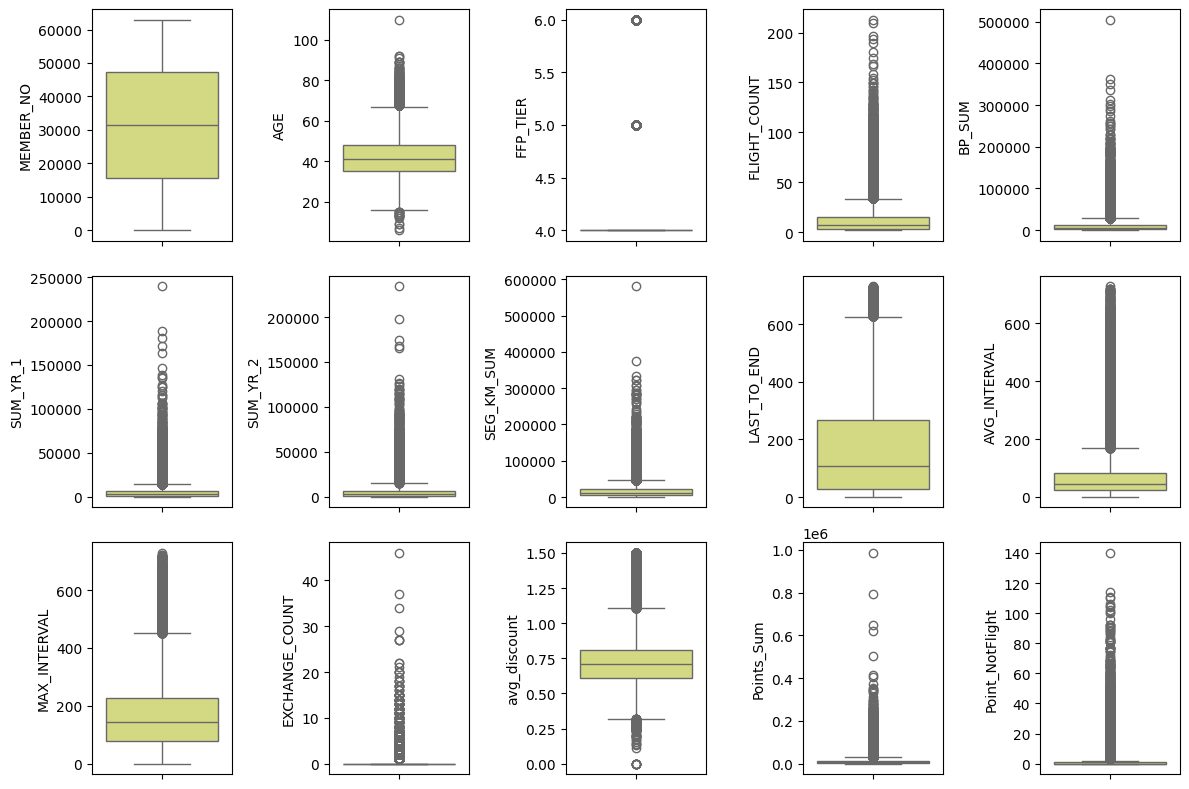

In [ ]:
#   Comprobar la distribución y los valores atípicos utilizando el diagrama de caja(Análisis univariado)
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='#DFE674', orient='v')
    plt.tight_layout()

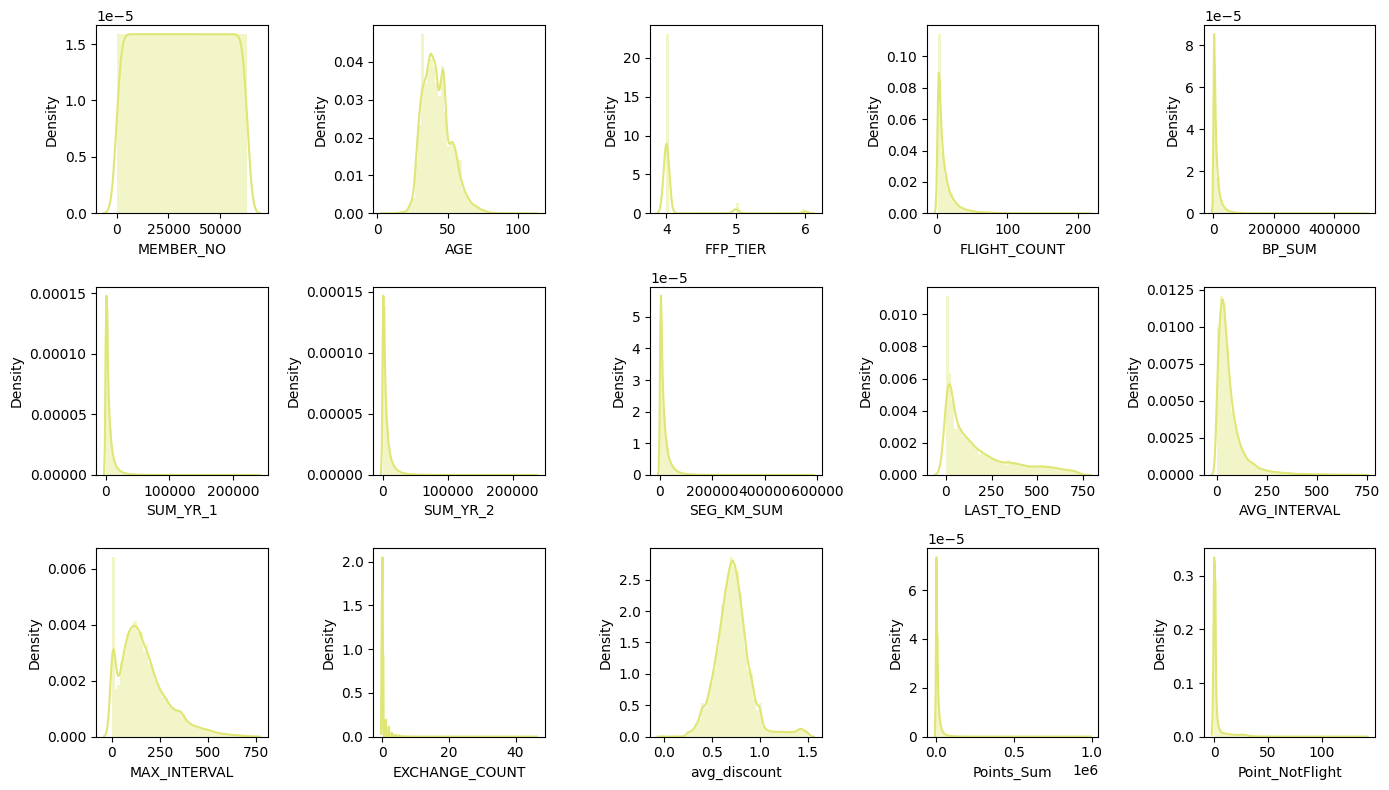

In [ ]:
# Comprobar la distribución y la asimetría con la trama
plt.figure(figsize=(14, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]], color='#DFE674')
    plt.tight_layout()

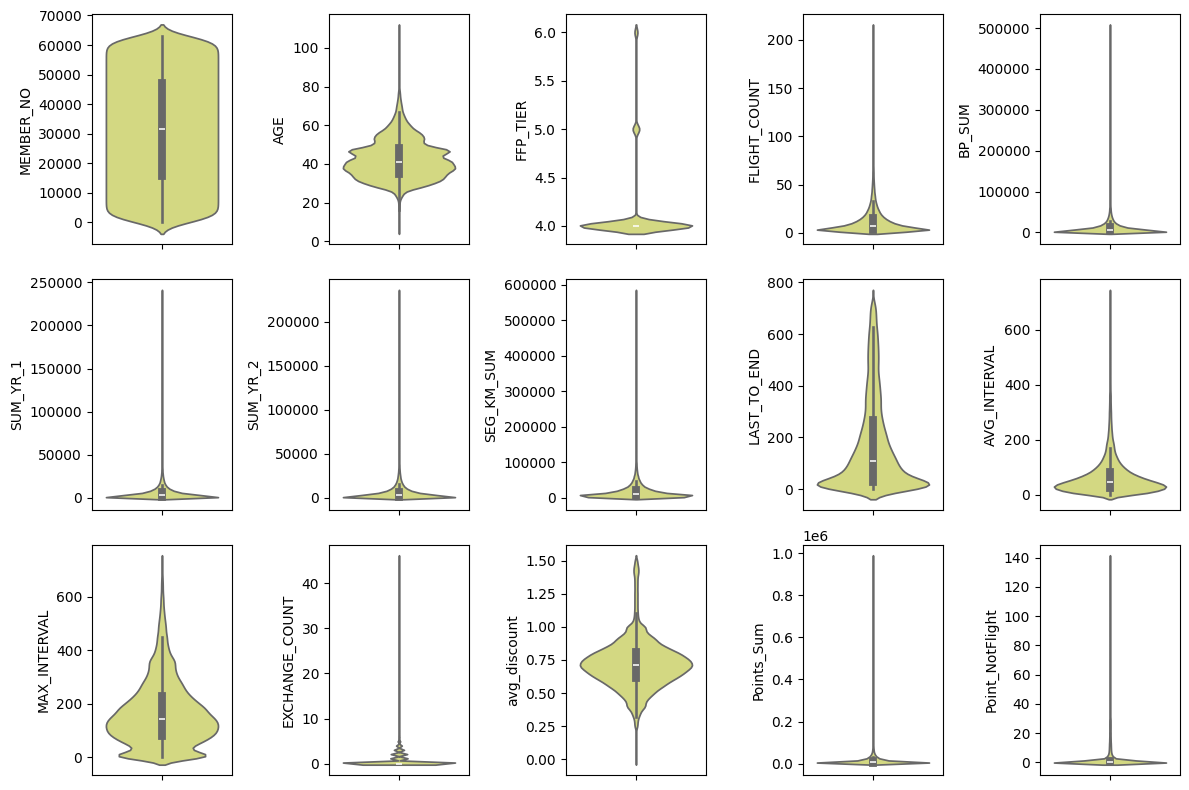

In [ ]:
# Comprobar distribución con violinplot
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], color='#DFE674', orient='v')
    plt.tight_layout()

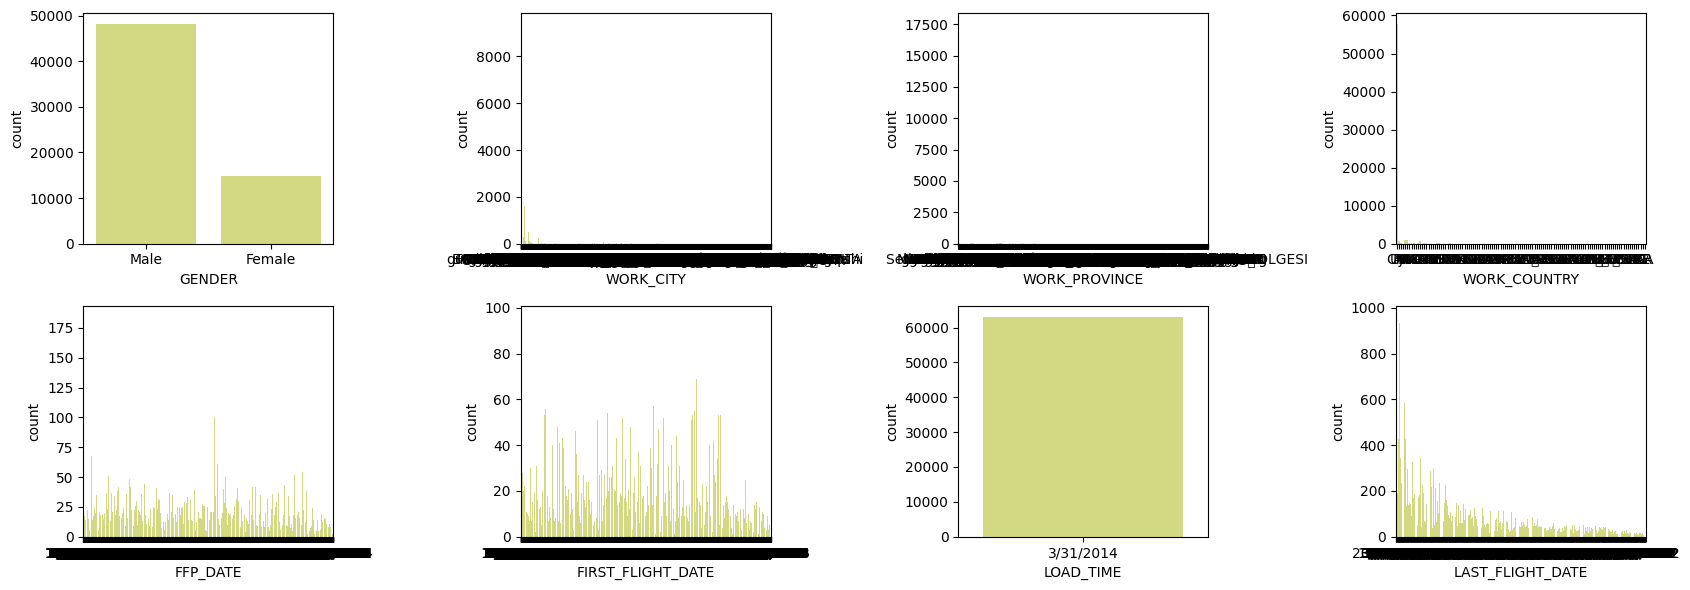

In [ ]:
# Gráfico de recuento de características categóricas
plt.figure(figsize=(17, 6))
for i in range(0, len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=df[cats[i]], color='#DFE674', orient='v')
    plt.tight_layout()

> No se obtuvieron demasiadas ideas, por lo que se decidió crear una visualización de WORK_CITY, WORK_PROVINCE, WORK_COUNTRY para sus 10 valores más ponderantes

Text(0, 0.5, 'count')

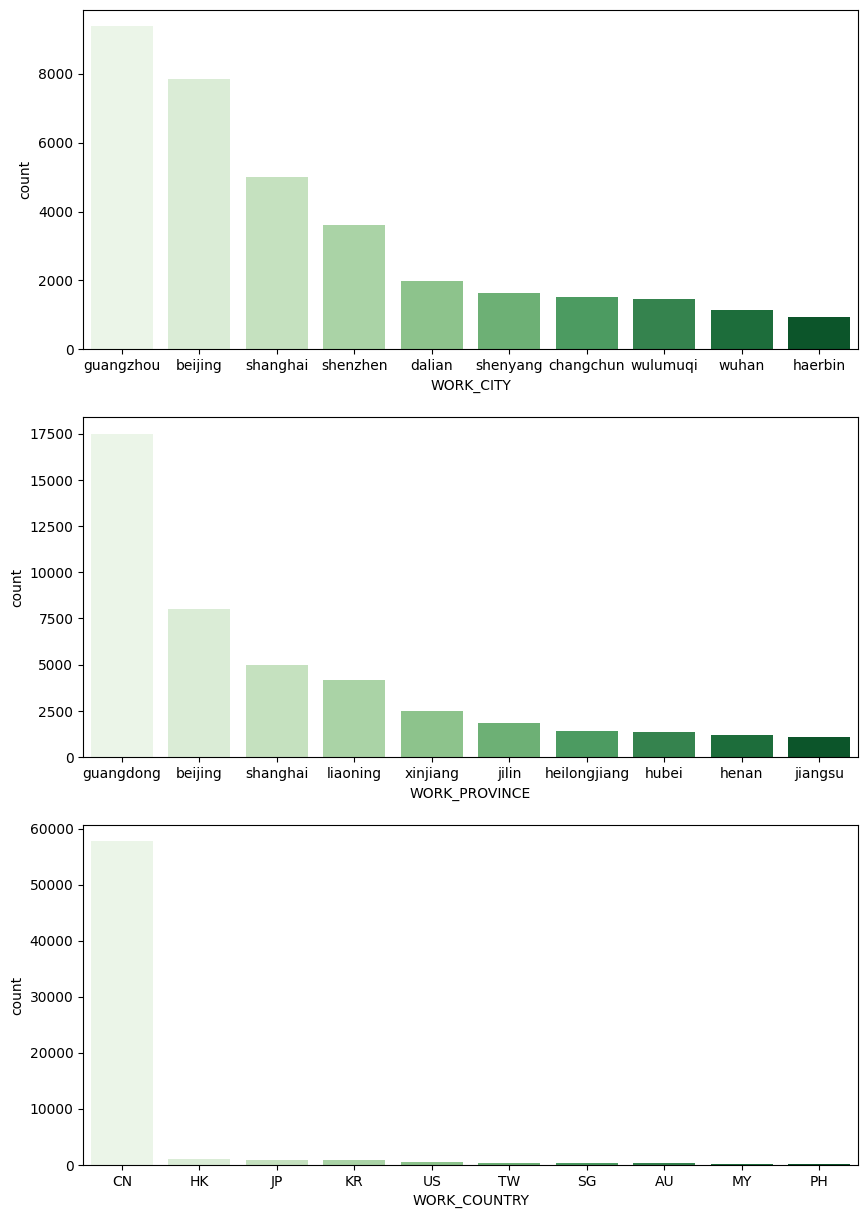

In [ ]:
# Crear un gráfico en el formato de 3 filas con 1 columna
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,15))

# work_city
# Tome el número de ciudades con la décima mayor cantidad de usuarios
work_city_top10 = df['WORK_CITY'].value_counts().head(10)
# Crear visualizaciones en forma de barra
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0], palette=('Greens'))
ax[0].set_xlabel('WORK_CITY')
ax[0].set_ylabel('count')

# work_province
# Tome el número de provincias con la décima mayor cantidad de usuarios
work_province_top10 = df['WORK_PROVINCE'].value_counts().head(10)
# Crear visualizaciones en forma de barra
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1], palette=('Greens'))
ax[1].set_xlabel('WORK_PROVINCE')
ax[1].set_ylabel('count')

# work_country
# Tome el número de países con la décima mayor cantidad de usuarios
work_country_top10 = df['WORK_COUNTRY'].value_counts().head(10)
# Crear visualizaciones en forma de barra
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[2], palette=('Greens'))
ax[2].set_xlabel('WORK_COUNTRY')
ax[2].set_ylabel('count')

Visualización de FFP_DATE, FIRST_FLIGHT_DATE y LAST_FLIGHT_DATE por año

Text(0.5, 0, 'FIRST FLIGHT DATE YEAR')

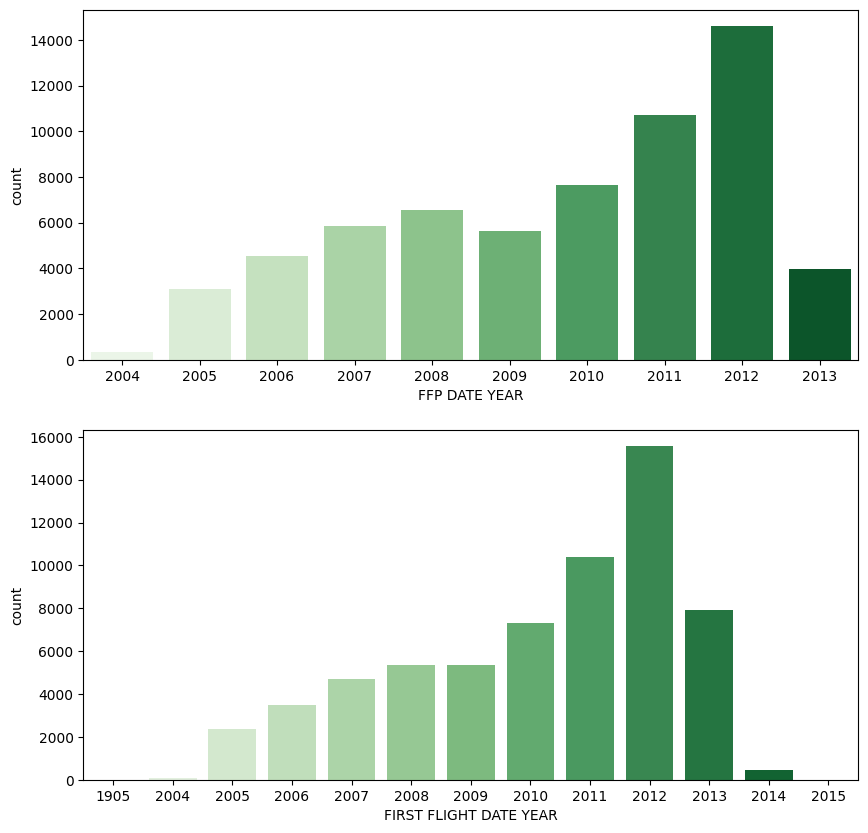

In [ ]:
# Crear un gráfico en 2 filas con formato de 1 columna
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

# FFP
# Cambiar el tipo de objeto a fecha y hora
FFP = pd.to_datetime(df['FFP_DATE']).dt.year
# Visualización
sns.countplot(x=FFP,ax=ax[0], palette=('Greens'))
ax[0].tick_params(axis='x')
ax[0].set_xlabel('FFP DATE YEAR')

# FFD
# cambiar el tipo de objeto a fecha y hora
FFD = pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year
# Visualización
sns.countplot(x=FFD, ax=ax[1], palette=('Greens'))
ax[1].tick_params(axis='x')
ax[1].set_xlabel('FIRST FLIGHT DATE YEAR')

En la función LAST_FLIGHT_DATE se encuentra el valor de fecha 29/2/2014, lo cual no tiene sentido porque 2014 no es un año bisiesto

In [ ]:
# Copiar el conjunto de datos para un análisis temporal
df_last = df.copy()

# Eliminar datos que tengan la fecha 29/2/2014
df_last.drop(df_last[df_last.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Text(0.5, 0, 'LAST FLIGHT DATE YEAR')

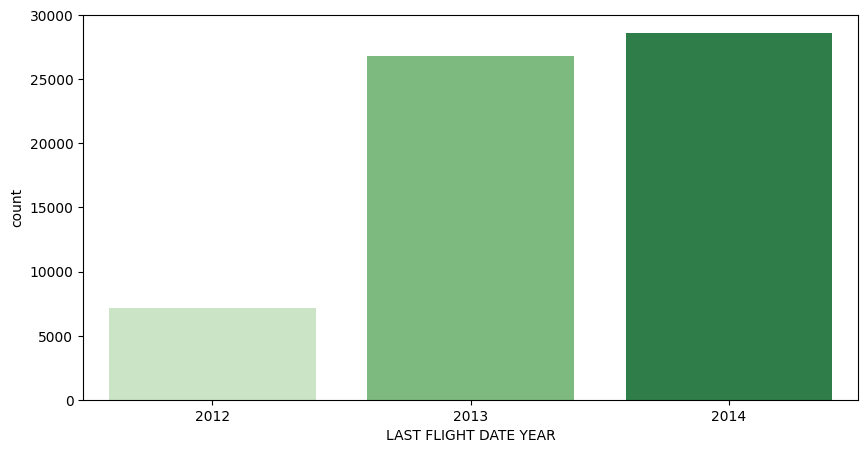

In [ ]:
# Crear visualizaciones
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
# Cambiar el tipo de objeto a fecha y hora
LFD = pd.to_datetime(df_last['LAST_FLIGHT_DATE']).dt.year
# Visualización
sns.countplot(x=LFD, palette='Greens')
ax.set_xlabel('LAST FLIGHT DATE YEAR')

> Resumen de resultados:
* La mayoría de las funciones tienen valores atípicos, excepto MEMBER_NO y FFP_TIER.
* La diversidad de características tiene una distribución sesgada positivamente, excepto MEMBER_NO y avg_discount, que tiende a ser cercana a lo normal.
* La mayoría de los usuarios son hombres.
* La mayoría de las características categóricas tienen valores únicos.
LOAD_TIME tiene 1 valor que es 2014-03-31
* La mayoría de los usuarios que se unieron se hicieron miembros en 2012
* Hay un valor de año muy lejano en la función FECHA DEL PRIMER VUELO, concretamente 1905.
* En la función LAST_FLIGHT_DATE hay un valor de fecha que no tiene sentido, es decir, la fecha 29/2/2014, este año no es bisiesto por lo que no hay 29 en febrero.

<Axes: >

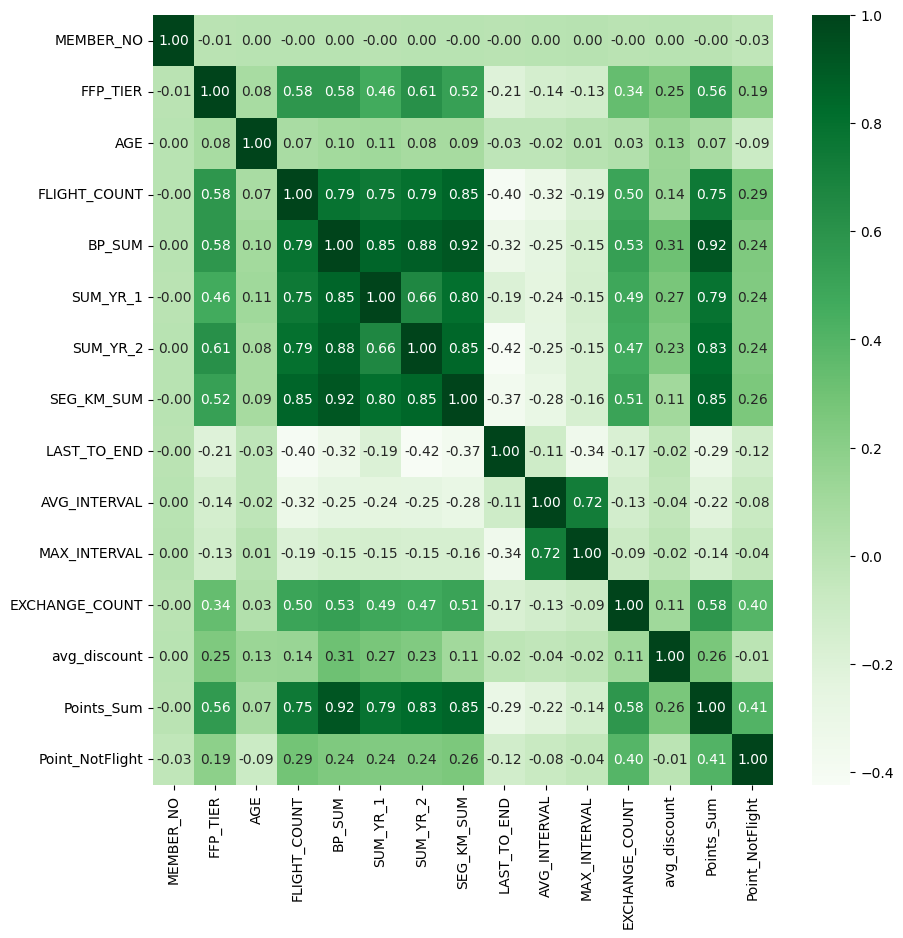

In [ ]:
# Correlación entre características(Analysis multivariable)
plt.figure(figsize=(10, 10))
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), cmap='Greens', annot=True, fmt='.2f')

> Resumen de las características que tienen alta correlación:
* Entre las características FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, Points_Sum
AVG_INTERVAL con MAX_INTERVAL
* Las características FLIGHT_COUNT, BP_SUM,SUM_YR_1, SUM_YR_2, SEG_KM_SUM están altamente correlacionadas entre sí. Cuanto más frecuentemente un cliente compre o vuele, mayor será la distancia del vuelo cubierta y mayores serán los ingresos por tarifas.

# **3. Ingeniería de características**

> Antes de mejorar el tipo de conjunto de datos, se decidió eliminar las características que no estaban relacionadas y tenían muchos valores únicos, a saber, MEMBER_NO, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, GENDER.

In [ ]:
# Fijación de tipo de datos
df_pre = df.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

> Se eliminó la fecha 29/2/2014 encontrada en LAST_FLIGHT_DATE

In [ ]:
# Eliminar registros
df_pre.drop(df_pre[df_pre.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

> Cambiando el tipo que tiene una función de fecha con fecha y hora.

In [ ]:
# Características que tienen un tipo de fecha y hora
date_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']

# Inicialización
for col in date_feature:
  df_pre[col] = pd.to_datetime(df_pre[col], errors='coerce')

df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   FFP_TIER           62988 non-null  int64         
 3   LOAD_TIME          62988 non-null  datetime64[ns]
 4   FLIGHT_COUNT       62988 non-null  int64         
 5   BP_SUM             62988 non-null  int64         
 6   SUM_YR_1           62437 non-null  float64       
 7   SUM_YR_2           62850 non-null  float64       
 8   SEG_KM_SUM         62988 non-null  int64         
 9   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 10  LAST_TO_END        62988 non-null  int64         
 11  AVG_INTERVAL       62988 non-null  float64       
 12  MAX_INTERVAL       62988 non-null  int64         
 13  EXCHANGE_COUNT     62988 non-null  int64         
 14  avg_di

In [ ]:
# Manejo del valor faltante
df_pre.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
FFP_TIER               0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE     421
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [ ]:
# Porcentaje de registros/filas que contienen valores faltantes
df_nan = df_pre[df_pre.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(df_nan)/len(df_pre)*100, 2)}%')

Persentase missing value pada dataset : 0.0%


> Debido a que el valor faltante era solo del 1,8%, se decidió eliminarlo porque no afectaba significativamente los resultados del modelado.

In [ ]:
# Elimina filas de datos de los valores faltantes SUM_YR_1, SUM_YR_2
df_pre = df_pre.dropna()

# Comprobar si hay valores faltantes
df_pre.isna().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

> Limpieza de datos según procedimientos estándar para conjuntos de datos de aviación (Tao, 2020)

Registros donde el precio del boleto (SUM_YR_1,SUM_YR_2) contiene el valor 0, y el descuento promedio (avg_discount) no es cero, y donde el kilometraje total (SEG_KM_SUM) es mayor que cero.
Se supone que el usuario no tiene historial de viajes.

In [ ]:
# Columna de caída
df_pre.drop(df_pre[(df_pre['SUM_YR_1'] == 0) & (df_pre['SUM_YR_2'] == 0) & (df_pre['avg_discount'] == 0) & (df_pre['SEG_KM_SUM'] > 0)].index, inplace = True)

df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61871 entries, 0 to 62978
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61871 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61871 non-null  datetime64[ns]
 2   FFP_TIER           61871 non-null  int64         
 3   LOAD_TIME          61871 non-null  datetime64[ns]
 4   FLIGHT_COUNT       61871 non-null  int64         
 5   BP_SUM             61871 non-null  int64         
 6   SUM_YR_1           61871 non-null  float64       
 7   SUM_YR_2           61871 non-null  float64       
 8   SEG_KM_SUM         61871 non-null  int64         
 9   LAST_FLIGHT_DATE   61871 non-null  datetime64[ns]
 10  LAST_TO_END        61871 non-null  int64         
 11  AVG_INTERVAL       61871 non-null  float64       
 12  MAX_INTERVAL       61871 non-null  int64         
 13  EXCHANGE_COUNT     61871 non-null  int64         
 14  avg_discoun

Selección de características

Utilizando el modelo LRFMC. La explicación de LRFMC según Tao (2020) es la siguiente:

> * L (LEALIDAD): El tiempo que un usuario se convierte en miembro (en meses) se conoce a partir de la diferencia entre el tiempo de observación y el momento en que se convierte en miembro.
* R (RECENCIA): El número de meses desde el último vuelo del miembro desde el final del tiempo de observación.
* F (FRECUENCIA): Número total de veces que el usuario ha volado durante el periodo de observación.
* M (MONETARIO): Millas o distancia acumulada durante el tiempo de observación del usuario.
* C (DESCUENTO): El valor promedio del factor de descuento utilizado por los usuarios durante el período de observación.


Entonces las características tomadas:

FPP_DATE (Fecha de incorporación al programa de viajero frecuente)
LOAD_TIME (Fecha de captura de datos)
FLIGHT_COUNT (Número de vuelos de clientes)
AVG_DISCOUNT (descuento promedio recibido por los clientes)
SEG_KM_SUM (Distancia total (km) de vuelos realizados)
LAS_TO_END (distancia del tiempo del último vuelo hasta la reserva de vuelo más reciente)

In [ ]:
# Seleccionar características
df_feats = df_pre[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

# Crear funciones para fidelizar a partir de funciones existentes
df_feats['TIME_MONTH'] = ((df_pre['LOAD_TIME'] - df_pre['FFP_DATE']).dt.days/30).astype(int)

df_feats = df_feats[['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].copy()
df_feats.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61871 entries, 0 to 62978
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    61871 non-null  int64  
 1   LAST_TO_END   61871 non-null  int64  
 2   FLIGHT_COUNT  61871 non-null  int64  
 3   SEG_KM_SUM    61871 non-null  int64  
 4   avg_discount  61871 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.8 MB


In [ ]:
df_feats.sample(5)

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
25737          66            5            11       16353      0.562445
29798          16          106             5       14541      0.519347
2172          112          131            16       73903      0.688235
29224          30           29             7       10208      0.760412
21632          31            5            16       12614      0.893131

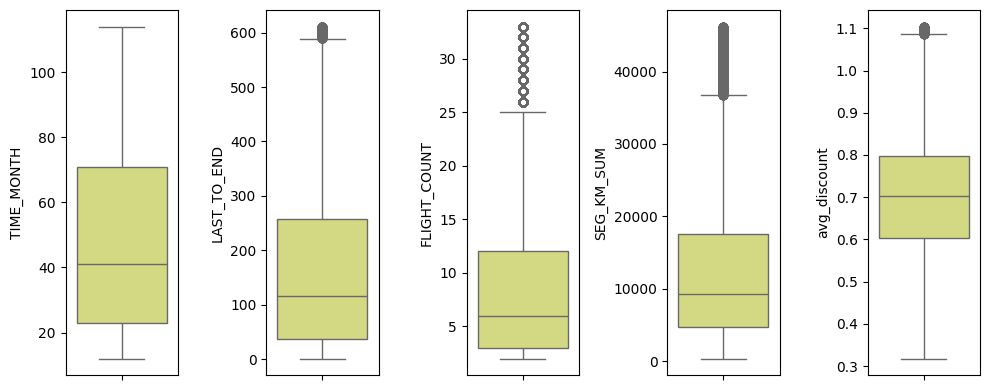

In [ ]:
# Tratamiento de los valores atípicos
lrfmc = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_feats[lrfmc[i]], color='#DFE674', orient='v')
    plt.tight_layout()

In [ ]:
print(f'Número de filas antes de filtrar valores atípicos: {len(df_feats)}')

fil_ent = np.array([True] * len(df_feats))
for col in lrfmc:
    Q1 = df_feats[col].quantile(0.25)
    Q3 = df_feats[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_feats[col] >= low_limit) & (df_feats[col] <= high_limit)) & fil_ent

df_feats = df_feats[fil_ent].reset_index(drop=True)

print('Número de filas después de filtrar valores atípicos', len(df_feats))

Número de filas antes de filtrar valores atípicos: 48327
Número de filas después de filtrar valores atípicos 46918


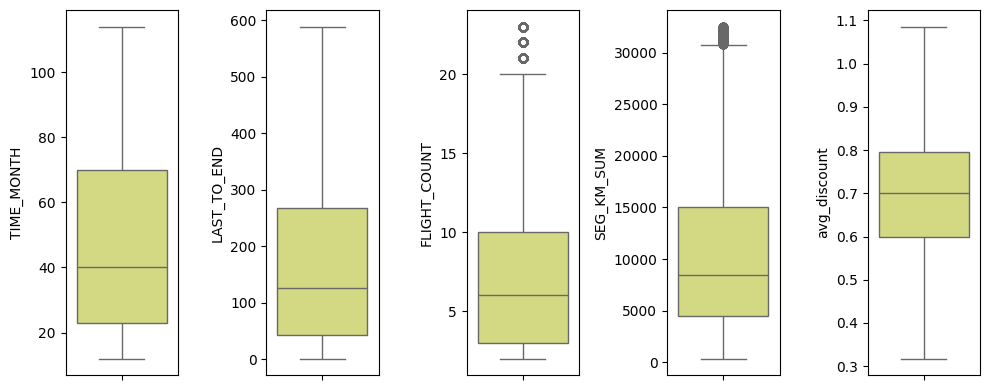

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(0, len(lrfmc)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df_feats[lrfmc[i]], color='#DFE674', orient='v')
    plt.tight_layout()

In [ ]:
df_feats=df_feats.drop(columns='index')

In [ ]:
# Estandarización de características: ver conjunto de datos de resumen estadístico
df_feats.describe()

level_0    TIME_MONTH   LAST_TO_END  FLIGHT_COUNT    SEG_KM_SUM  \
count  46918.000000  46918.000000  46918.000000  46918.000000  46918.000000   
mean   27935.210026     47.136174    174.791914      7.467646  10518.865659   
std    13888.294670     27.718639    157.432686      5.236530   7450.835479   
min      187.000000     12.000000      1.000000      2.000000    368.000000   
25%    16131.250000     23.000000     43.000000      3.000000   4513.000000   
50%    27964.500000     40.000000    126.000000      6.000000   8417.500000   
75%    39894.750000     70.000000    267.000000     10.000000  15019.000000   
max    51940.000000    114.000000    589.000000     23.000000  32517.000000   

       avg_discount  
count  46918.000000  
mean       0.696000  
std        0.146309  
min        0.317766  
25%        0.597974  
50%        0.700000  
75%        0.796349  
max        1.085566

In [ ]:
# Cambiar el nombre de la característica
df_feats.columns =['L', 'R', 'F', 'M', 'C', 'index']

In [ ]:
# Estandarización usando StandardScaler
features = ['L', 'R', 'F', 'M', 'C', 'index']
X = df_feats[features].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data = X_std, columns = features)

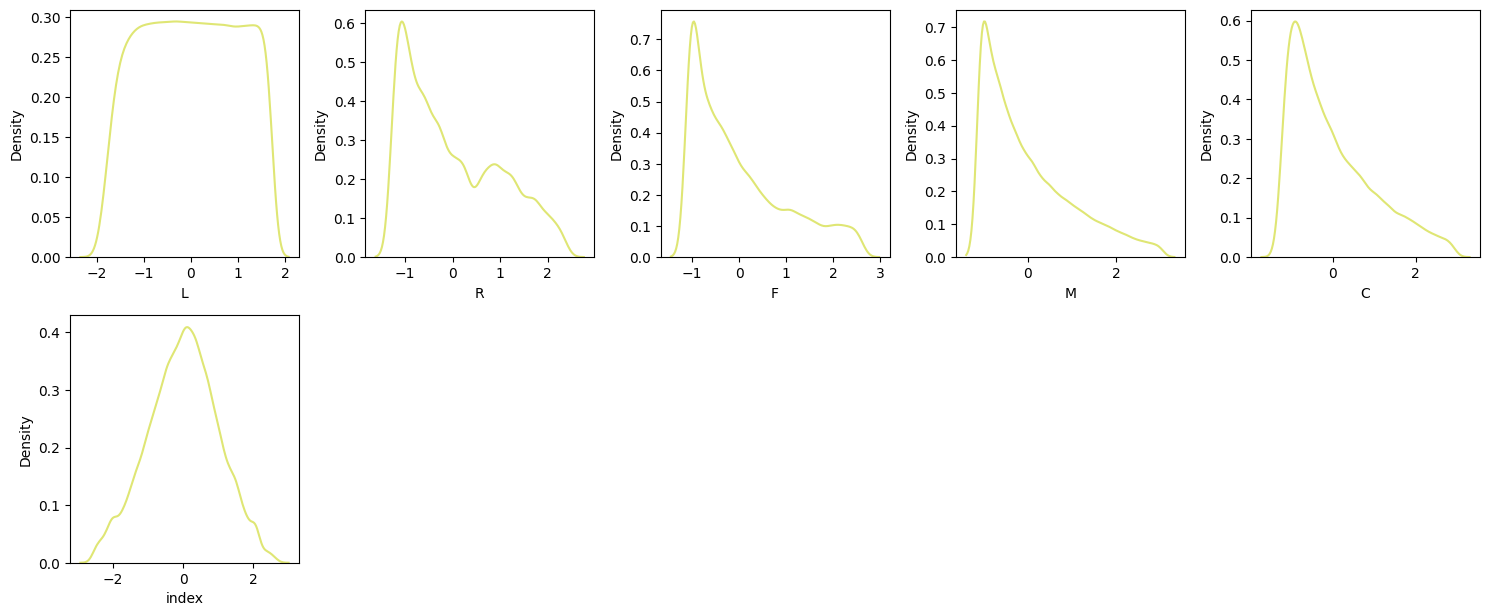

In [ ]:
# Ver la distribución de datos que se ha estandarizado
plt.figure(figsize=(15, 15))
for i in range(0, len(features)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(df_std[features[i]], color='#DFE674')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# ver resumen de estadísticas
df_std.describe()

L             R             F             M             C  \
count  46918.000000  4.691800e+04  4.691800e+04  4.691800e+04  4.691800e+04   
mean       0.000000  3.876954e-17  8.723147e-17 -1.938477e-17 -7.753909e-17   
std        1.000011  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min       -1.997978 -1.267614e+00 -1.103924e+00 -1.044146e+00 -1.362394e+00   
25%       -0.849931 -8.707654e-01 -8.371408e-01 -8.531783e-01 -8.060747e-01   
50%        0.002109 -2.574531e-01 -3.099257e-01 -2.802737e-01 -2.820339e-01   
75%        0.861133  8.248627e-01  5.857047e-01  4.835992e-01  6.039836e-01   
max        1.728437  2.412259e+00  2.631045e+00  2.966186e+00  2.952470e+00   

              index  
count  4.691800e+04  
mean  -7.656985e-16  
std    1.000011e+00  
min   -2.585193e+00  
25%   -6.699967e-01  
50%    2.733902e-02  
75%    6.858737e-01  
max    2.662647e+00

In [ ]:
df_std=df_std.copy()

# **4. Modelando el análisis**


> Para encontrar el número óptimo de conglomerados en el conjunto de datos, se realizó un análisis de n conglomerados utilizando el método del codo y la puntuación de silueta.

Text(0, 0.5, 'Inertia')

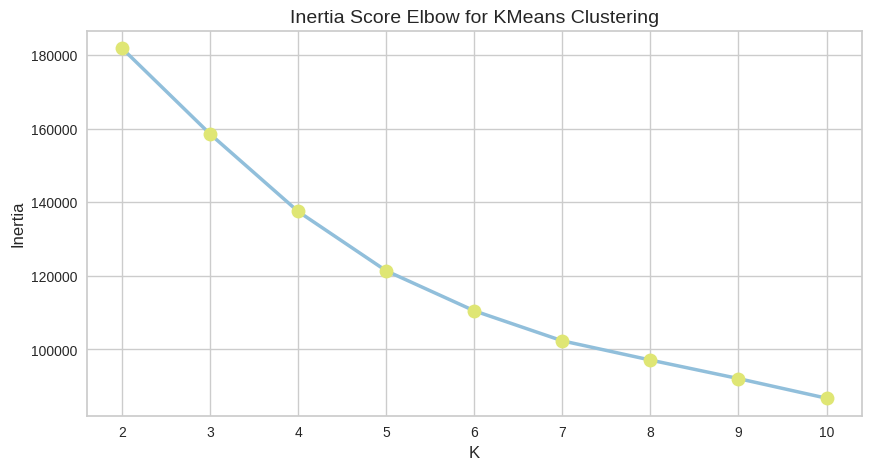

In [ ]:
## Método de codo: Inercia y Distorsión

# Encontrar el valor k óptimo con parámetros de inercia
from sklearn.cluster import KMeans

inertia = []
k_values = range(2,11)

# Ajuste del modelo
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

# Visualización de la gráfica del método del codo.
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10, 5))

# Gráfico: plot
plt.plot(k_values, inertia ,color='#91bfdb', linewidth= 2.5, marker='o', markerfacecolor='#DFE674', markersize=10)
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.xlabel('K',fontsize=12)
plt.ylabel('Inertia',fontsize=12)

> Según el gráfico resultante, no hay caídas ni interrupciones bruscas en el valor, por lo que no se conoce con certeza el valor óptimo de k.

In [ ]:
# Análisis adicional con el porcentaje de inercia
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    12.818348
1    13.282261
2    11.724994
3     8.955813
4     7.382687
5     5.102451
6     5.189379
7     5.793156
8          NaN
dtype: float64

> A partir de la diferencia en los valores resultantes, el valor k óptimo está entre 2 y 4.

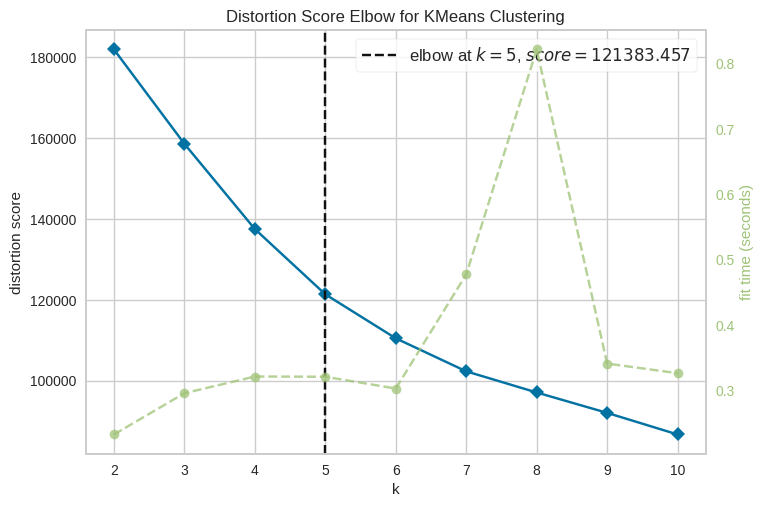

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualización internaltia vs k con parámetros de distorsión
from yellowbrick.cluster import KElbowVisualizer

# Ajuste del modelo
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()


> Según el gráfico anterior, con el parámetro de distorsión el valor óptimo es k = 5.

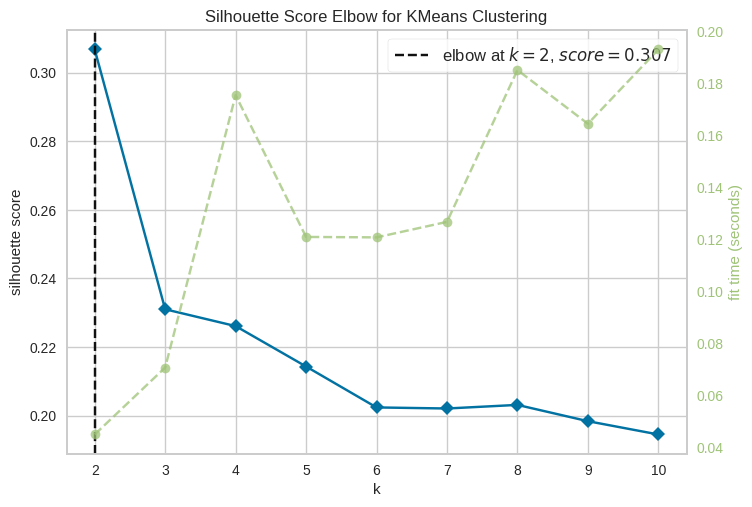

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Puntuación de silueta
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(df_std)
visualizer.show()

> Con base en los resultados anteriores, se encontró que muchos grupos óptimos se formaron en k = 2. Mientras tanto, la segunda opción fue en k = 3. Porque el valor promedio de estas siluetas era el más alto en comparación con los demás.

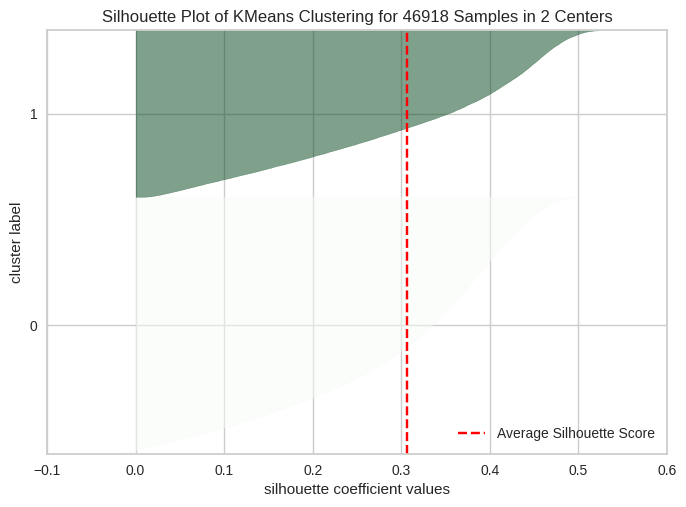

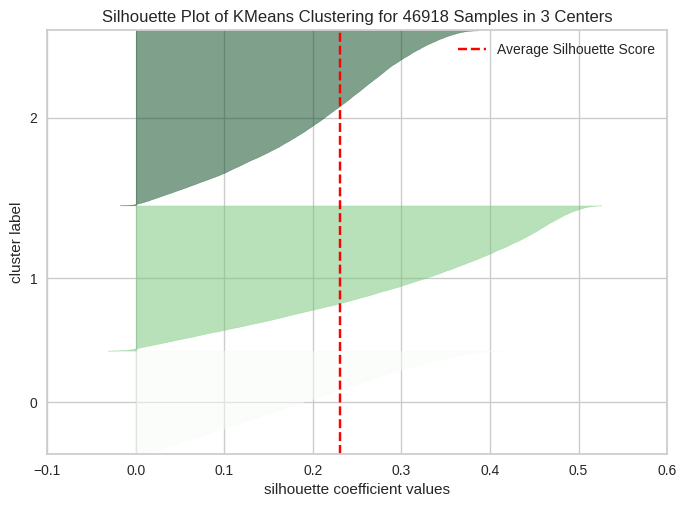

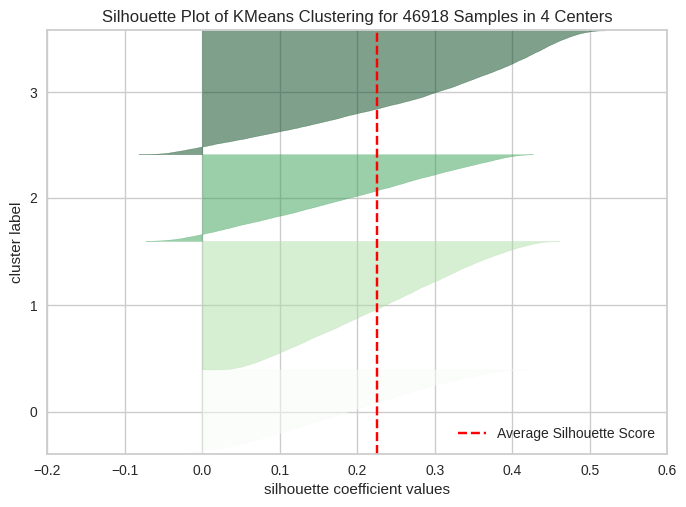

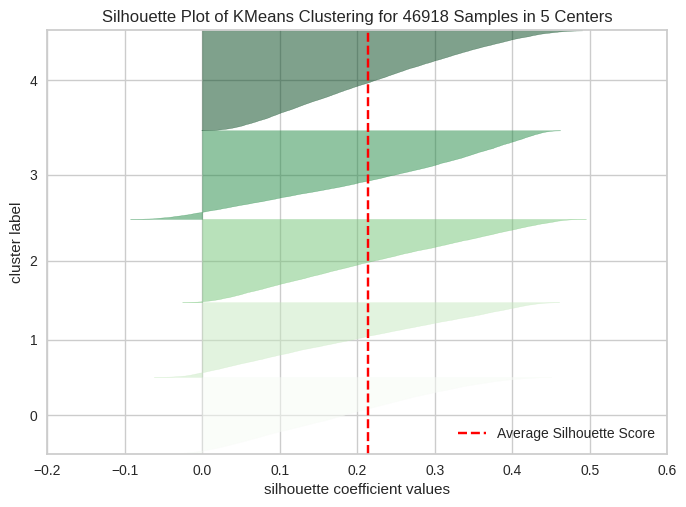

In [ ]:
# Parcelas de silueta
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2,3,4,5]:
    model = KMeans(i, random_state=123)
    visualizer = SilhouetteVisualizer(model, colors='Greens')
    visualizer.fit(df_std)
    visualizer.show()

> Con base en los resultados del gráfico de silueta, para determinar el mejor valor de k, se deben considerar dos factores, a saber, el coeficiente promedio lo más grande posible, pero aún más pequeño que la puntuación máxima de cada miembro del grupo, y el grosor de los grupos que son similares. entre sí, lo que indica una composición equilibrada.

Según consideraciones de análisis anteriores, se eligió k = 5 para n-grupos en el análisis de K-Medias.

In [ ]:
# K-means clustering
from sklearn.cluster import KMeans

# Ajuste del modelo
kmeans = KMeans(n_clusters=5, random_state = 123)
kmeans.fit(df_std.values)
df_std['cluster'] = kmeans.labels_

df_std.head()

L         R         F         M         C     index  cluster
0 -1.997978 -1.051151 -0.386150 -0.662210  2.951262  2.641690        3
1 -1.989121  1.293866  0.229993 -0.662210  2.951262  2.282857        3
2 -1.989049  2.231873 -0.951477  2.393281  2.772488  2.578859        3
3 -1.988113 -0.726457 -0.595765  2.202313  2.827382  2.455373        3
4 -1.985305 -0.906843 -0.417909  0.865536  2.923077  2.197031        3

In [ ]:
## Evaluación mediante PCA y visualización
# Realicé PCA para ver la visualización
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)


df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = df_std['cluster']
df_pca

PC 1      PC 2  cluster
0      2.700986  0.563240        3
1      2.336224  1.882416        3
2      3.815883  3.434491        3
3      3.890169  1.483972        3
4      3.316952  0.964307        3
...         ...       ...      ...
46913 -2.937180 -0.163399        1
46914 -2.802895 -1.150576        1
46915 -2.178777 -2.419790        2
46916 -3.099770  1.591852        0
46917 -1.871957 -0.622548        2

[46918 rows x 3 columns]

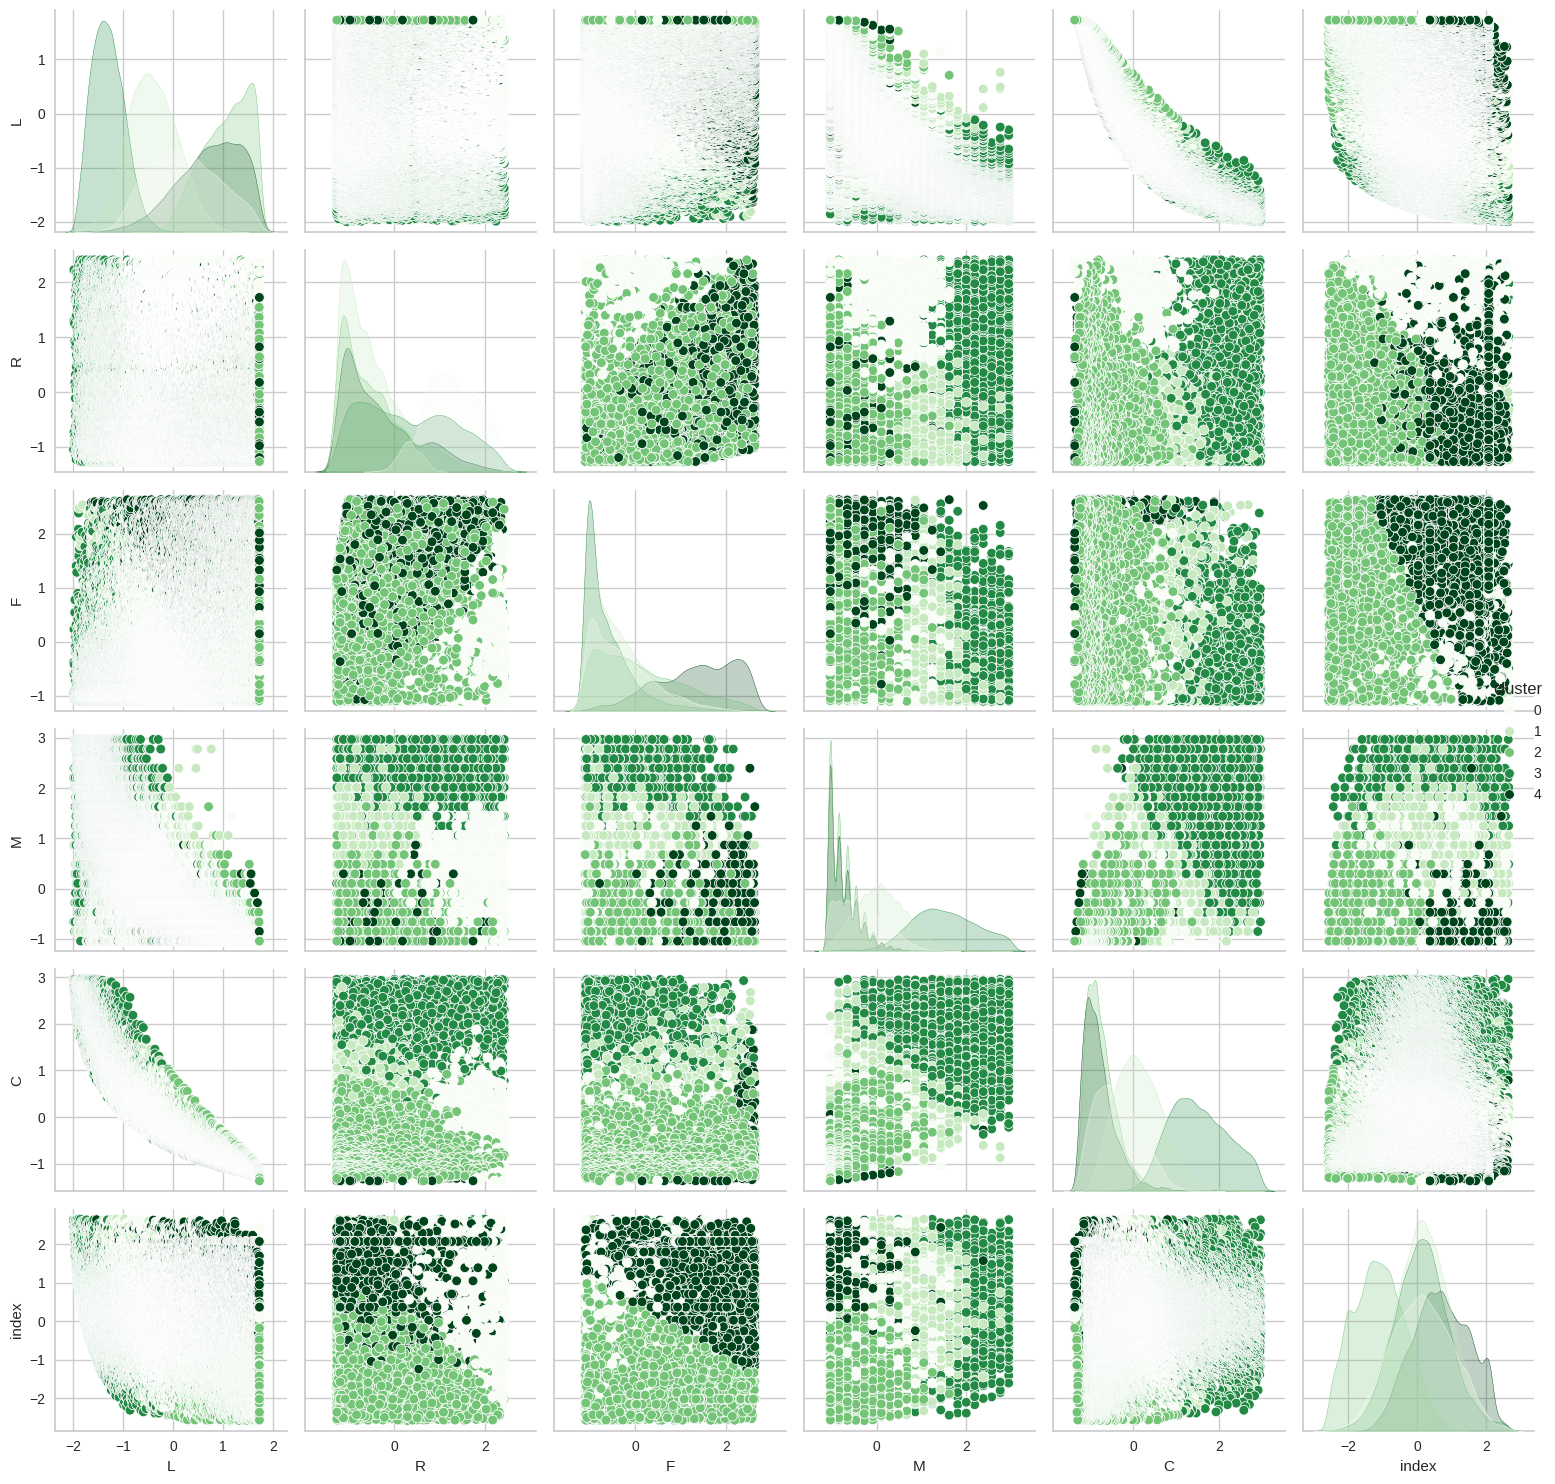

In [ ]:
# Visualización con diagrama de pares
sns.pairplot(data=df_std, hue='cluster', diag_kind='kde', palette='Greens')
plt.tight_layout()

Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

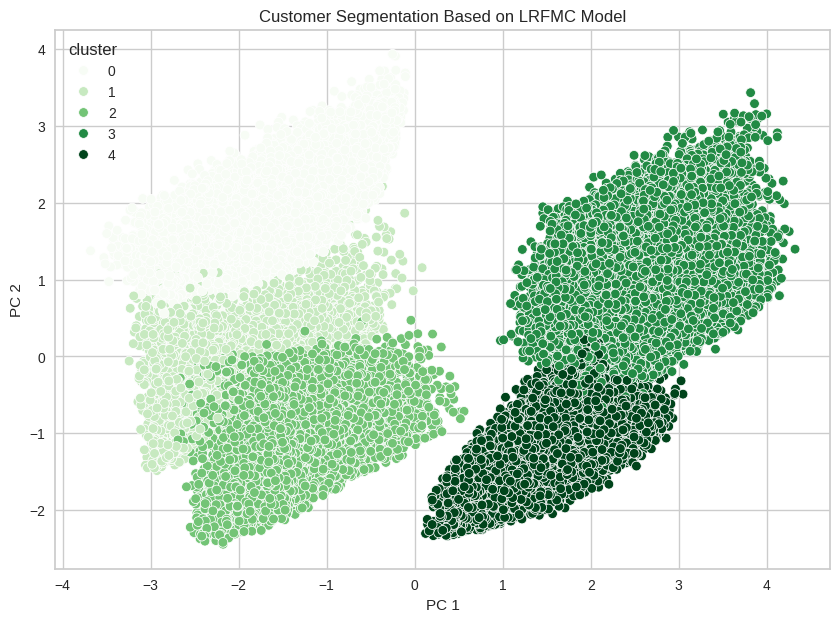

In [ ]:
# Visualización de resultados de segmentación
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=df_pca, x="PC 1", y="PC 2", hue="cluster", palette='Greens')
plt.title('Customer Segmentation Based on LRFMC Model')

# **5. Interpretación y recomendación**

In [ ]:
# Agregar cluster al dataframe
df_feats['cluster'] = kmeans.labels_
display(df_feats.groupby('cluster').agg(['mean','median','min','max']))

L                                 R                  \
                 mean   median    min    max       mean median min  max   
cluster                                                                   
0        30901.816814  30406.0   4977  51939  82.283833   82.0  36  114   
1        22079.695695  21806.0   1569  45786  29.632614   27.0  12   73   
2        42601.096421  43522.5  19301  51940  34.715727   30.0  12  114   
3         9750.489723   9424.5    187  28769  55.651201   53.0  12  114   
4        37973.105022  38987.0   4426  51937  38.186021   32.0  12  113   

                  F         ...   M                 C                        \
               mean median  ... min max          mean   median   min    max   
cluster                     ...                                               
0        132.966138  109.0  ...   2  16   7783.560024   7297.0   368  24464   
1        114.471347   87.0  ...   2  22  11592.507806  11214.0  2270  31231   
2        196.523102  166.0  ...   2  16   4933.603145   4366.5   368  20659   
3         81.650590   49.0  ...   2  23  21850.645604  21388.5  7779  32517   
4        384.735394  401.0  ...   2  20   4663.497827   4035.5   368  24464   

            index                                
             mean    median       min       max  
cluster                                          
0        0.716086  0.715000  0.317766  1.084893  
1        0.722613  0.720142  0.340147  1.085566  
2        0.533127  0.530206  0.317898  0.851131  
3        0.714457  0.712019  0.338710  1.085512  
4        0.799160  0.800000  0.487840  1.083132  

[5 rows x 24 columns]

In [ ]:
# Porcentaje de clientes para cada grupo
cluster_count = df_feats['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_std))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

cluster  count  percentage (%)
0        0   8505           18.13
1        1  11081           23.62
2        2   9220           19.65
3        3   9828           20.95
4        4   8284           17.66

Text(0, 0.5, 'Percentage')

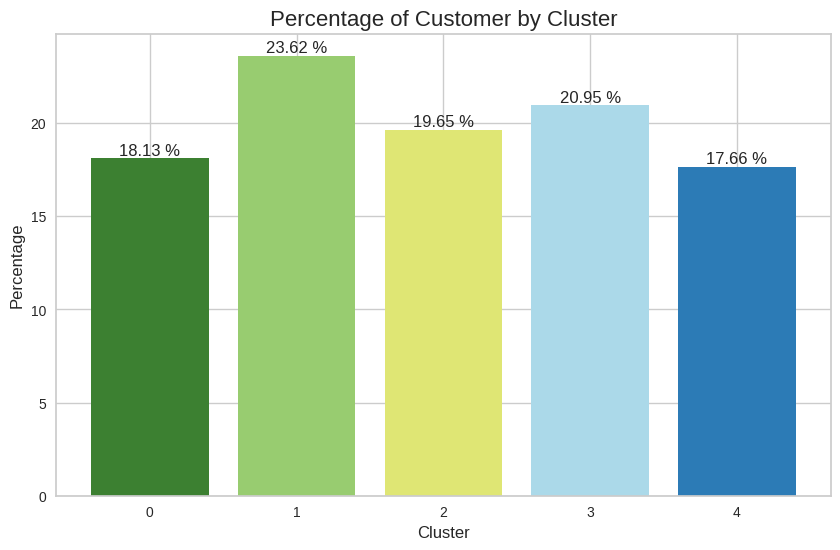

In [ ]:
# Visualización del porcentaje de clientes en cada cluster
fig, ax = plt.subplots(figsize=(10,6))

c = ["#3C8031","#98CC70","#DFE674","#abd9e9","#2c7bb6"]
bars = plt.bar(x=cluster_count['cluster'], height= cluster_count['percentage (%)'],color=c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')
plt.title('Percentage of Customer by Cluster', fontsize=16)
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

Text(0, 0.5, 'Value')

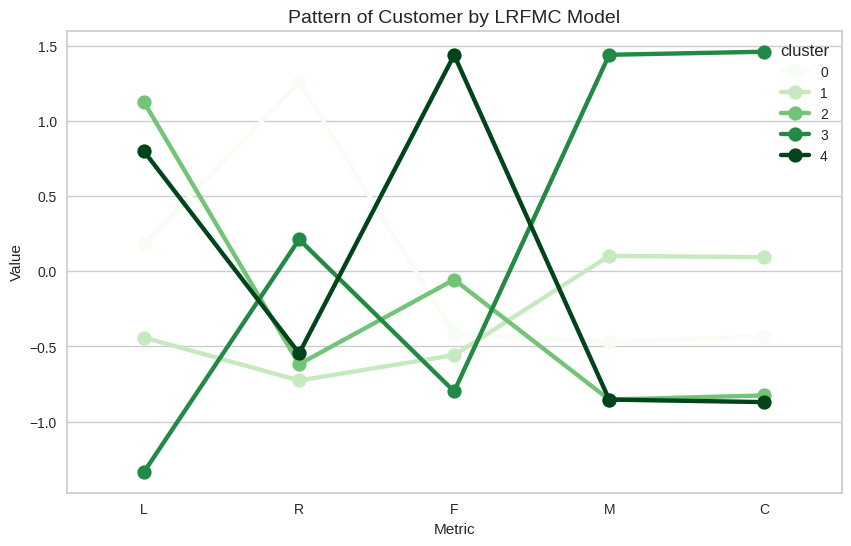

In [ ]:
# Ver el patrón LRFMC en cada grupo
cluster_med=df_std.groupby('cluster').median().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='cluster', value_vars=['L', 'R', 'F','M','C'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster', palette='Greens')
plt.title('Pattern of Customer by LRFMC Model', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

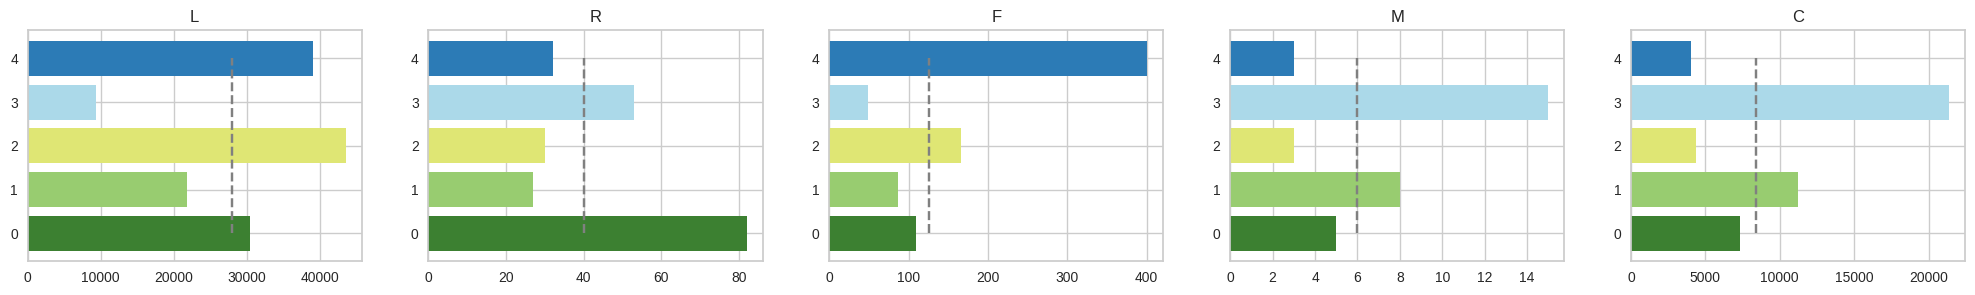

In [ ]:
# Mirando la variable LRFMC promedio entre grupos
LRFMC= ['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_feats[col].median(), ymin=0, ymax=4, color='grey', linestyle='--')
        g = df_feats.groupby('cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x,y, color=c)
        plt.title(col)
        i = i+1

dist_list(LRFMC)

> En general, estos grupos se formaron debido a diferencias en los indicadores del modelo LRFMC. Con base en los resultados del análisis y visualización, las características de los clientes de cada grupo se pueden identificar de la siguiente manera:

In [36]:
data = {'High Value': ['R', 'M C', 'L ','C M','F L'],
        'Average Value': ['L', '', 'F','F',''],
        'Low Value': ['F M C', 'L R F', 'R M C','M R','R M C']}

df = pd.DataFrame(data)

# Crear un índice personalizado
indice_personalizado = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']

# Establecer el índice personalizado en el DataFrame
df = df.set_index(pd.Index(indice_personalizado))

# Mostrar el DataFrame con el índice personalizado
display(df)

High Value Average Value Low Value
Cluster 0          R             L     F M C
Cluster 1        M C                   L R F
Cluster 2         L              F     R M C
Cluster 3        C M             F       M R
Cluster 4        F L                   R M C

Interpretación:

>  * Clúster 0: hibernación -->
Un grupo de clientes que son miembros desde hace un período de tiempo medio pero que no utilizan con frecuencia la aerolínea, tienen baja frecuencia y valores monetarios y alta antigüedad.
>
> * Clúster 1: Clientes leales -->
El grupo de clientes que han sido miembros durante el período más largo de tiempo y tienen una actividad de vuelo moderada, el lapso de tiempo para volar no es demasiado grande y utilizan la aerolínea con bastante frecuencia.
>
> * Clúster 2 - Leales potenciales -->
Los grupos de clientes que tienen una actividad de vuelos muy alta suelen utilizar aerolíneas y recorren largas distancias, por lo que tienen potencial para generar ingresos. Este grupo también tiene una tasa de actualidad baja, lo que significa que el lapso de tiempo para cada vuelo no es demasiado largo ni demasiado largo. Además, el cliente es miembro desde hace bastante tiempo.
>
> * Clúster 3: usuarios recientes -->
Un grupo de nuevos clientes que han utilizado recientemente la aerolínea. Esto se puede ver desde el momento en que te uniste como miembro no hace mucho y la tasa de actualidad es baja, aparte de eso, la actividad suele utilizar aerolíneas y la distancia recorrida es moderada.
>
> * Clúster 4: Necesita atención -->
Nuevo grupo de clientes que tienen baja actividad y uso de aerolíneas. Este grupo también tiene una tasa de descuento baja.

Recomendaciones:
> Clúster 0: hibernación
>> Clientes existentes, pero que no han utilizado la aerolínea recientemente. Se necesita tratamiento para que los clientes realicen compras lo antes posible, o la empresa perderá la confianza del cliente.
>>
>> Recomendaciones comerciales:
>>* Envíe correos electrónicos de marketing a clientes de este grupo con el programa "We Miss You" y proporcione vales especiales o códigos de descuento para usar en próximos vuelos con un período de validez predeterminado.
>
> Clúster 1: Clientes leales
>> Grupos de clientes que llevan mucho tiempo utilizando la aerolínea. Los clientes están satisfechos con los servicios prestados y no cambian a otras alternativas. Es importante brindar un trato para que los clientes se sientan apreciados.
>>
>> Recomendaciones comerciales:
>> * Envíe un correo electrónico de agradecimiento "Gracias por volar con nosotros" y proporcione un cupón/código de descuento para su próximo vuelo.
Proporcione puntos/recompensas por cada reserva de aerolínea que puedan canjearse por vales de descuento o productos afiliados con la aerolínea.
>
> Clúster 2 - Leales potenciales
>> Utiliza líneas aéreas con frecuencia y en largas distancias. Puede contribuir significativamente a los ingresos de la empresa. Los clientes de este grupo deben ser tratados con amabilidad y cuidado, y es necesario hacer que los clientes se sientan apreciados para que se conviertan en leales a la empresa.
>>
>> Recomendaciones comerciales:
>> * Establecer buenas relaciones con los clientes mediante asistencia durante el embarque, como proporcionar un asistente de reserva de vuelos.
Proporcionar souvenirs o mercancías.
Ofrece descuentos por comprar más de un vuelo a la vez.
Ofrezca descuentos/recompensas especiales al volar invitando a amigos.
Proporcione puntos/recompensas por cada reserva de aerolínea.
>
> Clúster 3: usuarios recientes
>> Los grupos que son nuevos en el uso de aerolíneas deben recibir tratamiento para convertirse en clientes leales a largo plazo. Es necesario realizar un seguimiento continuo para evitar que los clientes se vayan después de un determinado periodo de tiempo.
>>
>> Recomendaciones comerciales:
>> * Envíe un correo electrónico de agradecimiento "Gracias por volar con nosotros" y proporcione un cupón/código de descuento para su próximo vuelo.
Da puntos por cada vuelo.
Proporcionar recompensas/vales/descuentos después de lograr varios vuelos en un período determinado, por ejemplo 2 vuelos en 1 año.
>
> Clúster 4: Necesita atención
>> Pueden surgir nuevos grupos de clientes con muy bajo consumo por diversos motivos. Requiere un tratamiento personalizado según la demografía y los hábitos del cliente.
>>
>> Recomendaciones comerciales:
>> * Envío de campañas o promos personalizadas.
Envíe boletines para anunciar descuentos y programas de vuelos útiles para animar a los clientes a utilizar la aerolínea nuevamente.


#  **6. Referencia**

> Buckland T.(2024). Segmentos RFM basados ​​en análisis RFM: una guía detallada. Moengage. https://www.moengage.com/blog/rfm-analysis-using-rfm-segments/

> Makhija, P.(2024). What is RFM Analysis? Calculating RFM Score for Customer Segmentation. CleverTap. https://clevertap.com/blog/rfm-analysis/

>Tao, Y.(2020). Analysis Method for Customer Value of Aviation Big Data Based on LFRMC Model ICPCSEE,https://www.semanticscholar.org/paper/Analysis-Method-for-Customer-Value-of-Aviation-Big-Tao/213ccbc6ffae1c5d71eb71dea4c6fb29bcd2e675

>Wang, P. & Chen, T.(2022). Data Value Mining: A Case Study of Airline Customer Data. IJRES. https://www.ijres.org/papers/Volume-10/Issue-4/Ser-5/B10040513.pdf
